Unique values in 'Platform' column before cleaning:
 [' Twitter  ' ' Instagram ' ' Facebook ' ' Twitter ']

Unique values in 'Platform' column after cleaning:
 ['Twitter' 'Instagram' 'Facebook']

Top 10 Sentiments:
 Sentiment
Positive       45
Joy            44
Excitement     37
Contentment    19
Neutral        18
Gratitude      18
Curiosity      16
Serenity       15
Happy          14
Nostalgia      11
Name: count, dtype: int64


/var/folders/l_/rdh02bdn7jd_f294thcb2nwr0000gn/T/ipykernel_6161/447906840.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sentiments.index, y=top_sentiments.values, palette='viridis')


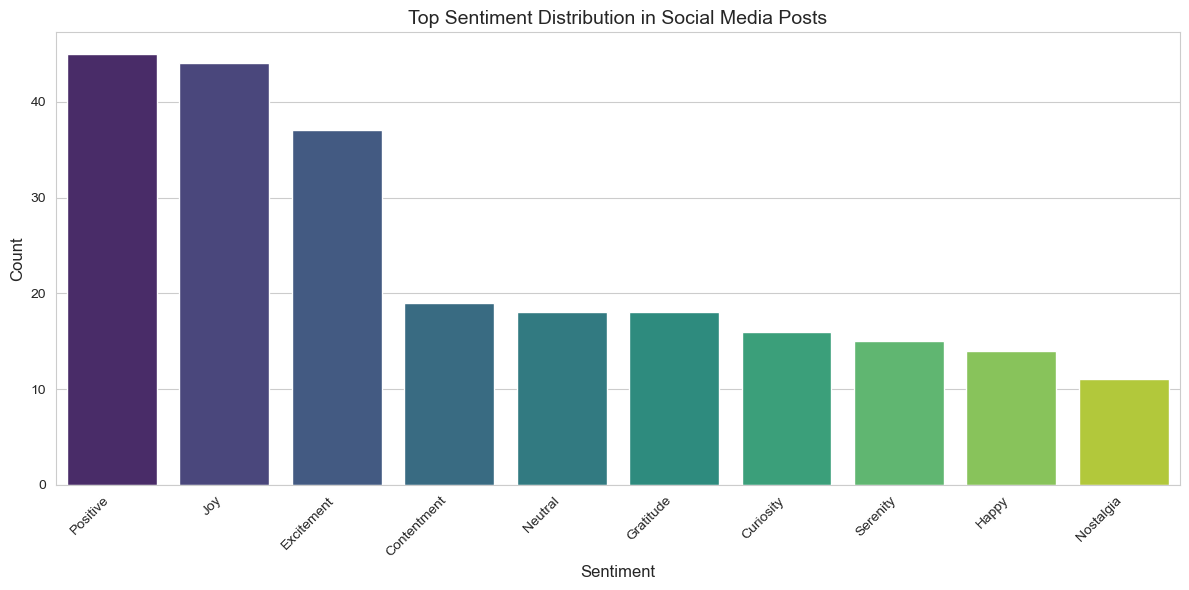

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('sentimentdataset.csv')

# Inspect unique values in the 'Platform' column
print("Unique values in 'Platform' column before cleaning:\n", data['Platform'].unique())

# Clean the 'Platform' column: standardize capitalization and strip whitespace
data['Platform'] = data['Platform'].str.strip().str.capitalize()
data['Sentiment'] = data['Sentiment'].str.strip()

# Verify the cleaning
print("\nUnique values in 'Platform' column after cleaning:\n", data['Platform'].unique())

# Count the occurrences of each sentiment
sentiment_counts = data['Sentiment'].value_counts()

# Limit to top 10 sentiments
top_n = 10
top_sentiments = sentiment_counts.head(top_n)
print(f"\nTop {top_n} Sentiments:\n", top_sentiments)

# Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_sentiments.index, y=top_sentiments.values, palette='viridis')
plt.title('Top Sentiment Distribution in Social Media Posts', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()



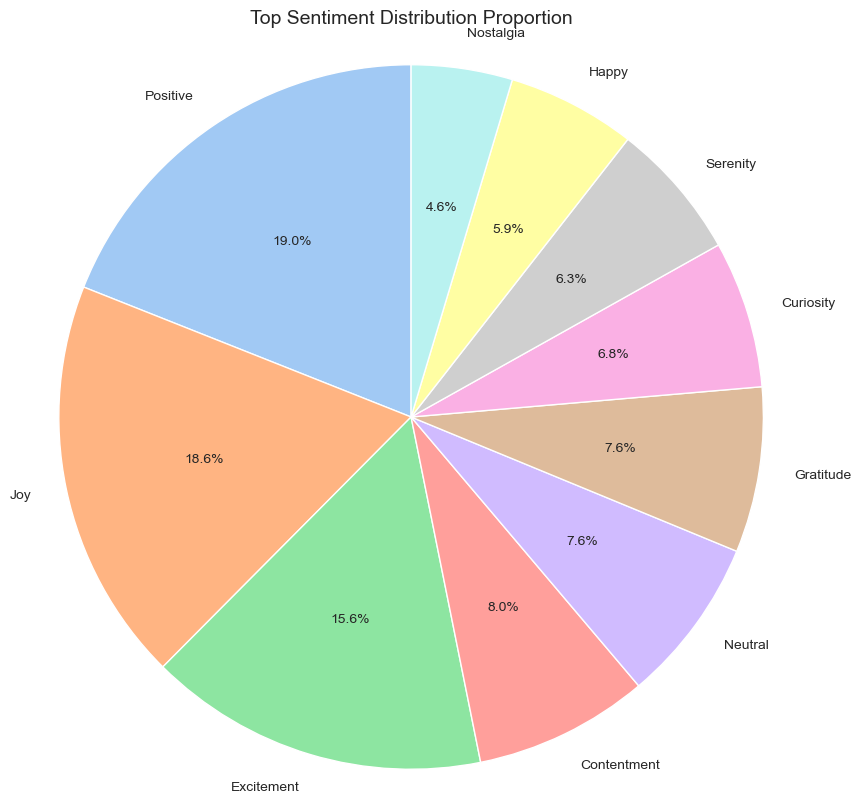


Sentiment Counts by Platform (Top Sentiments):
 Sentiment  Positive   Joy  Excitement  Contentment  Neutral  Gratitude  \
Platform                                                                 
Facebook       16.0  20.0        11.0          6.0      6.0        7.0   
Instagram      16.0  14.0        13.0          7.0      6.0        4.0   
Twitter        13.0  10.0        13.0          6.0      6.0        7.0   

Sentiment  Curiosity  Serenity  Happy  Nostalgia  
Platform                                          
Facebook         6.0       5.0    4.0        4.0  
Instagram        6.0       4.0    6.0        4.0  
Twitter          4.0       6.0    4.0        3.0  


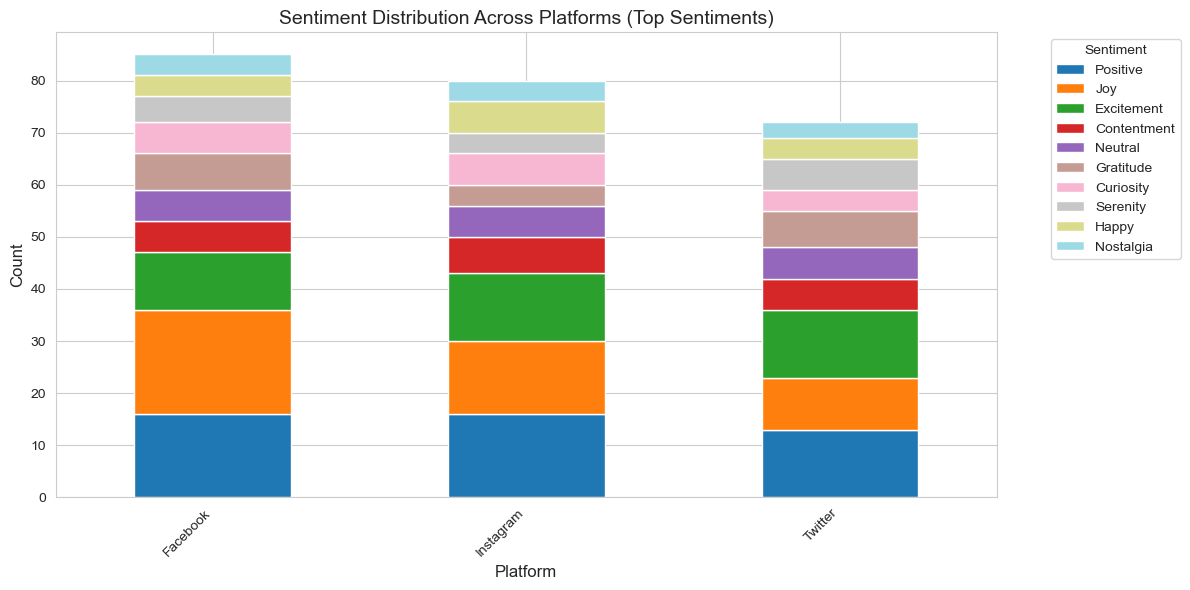

In [49]:
# Pie Chart
plt.figure(figsize=(10, 10))
plt.pie(top_sentiments, labels=top_sentiments.index, autopct='%1.1f%%', startangle=90, 
        colors=sns.color_palette('pastel'), textprops={'fontsize': 10})
plt.title('Top Sentiment Distribution Proportion', fontsize=14)
plt.axis('equal')
plt.show()

# Sentiment by Platform: Limit to top sentiments
platform_sentiment = data.groupby(['Platform', 'Sentiment']).size().unstack().fillna(0)
platform_sentiment_filtered = platform_sentiment[top_sentiments.index]
print("\nSentiment Counts by Platform (Top Sentiments):\n", platform_sentiment_filtered)

# Stacked Bar Chart
platform_sentiment_filtered.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Sentiment Distribution Across Platforms (Top Sentiments)', fontsize=14)
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

Conclusion

The sentiment analysis conducted on the social media dataset from sentimentdataset.csv provides valuable insights into the emotional tone of posts across different platforms (Twitter, Instagram, and Facebook). After cleaning the data to address inconsistencies in the 'Platform' column (e.g., standardizing "Twitter" and "twitter" entries), we focused on the top 10 most frequent sentiments to ensure clarity in visualization and interpretation. The key findings are summarized as follows:


Sentiment Distribution:
The bar chart reveals that Positive (45 occurrences), Joy (44), and Excitement (37) are the most dominant sentiments in the dataset, indicating a generally upbeat tone in the social media posts analyzed.

Other notable sentiments include Contentment (19), Neutral (18), Gratitude (18), Curiosity (16), Serenity (15), Happy (14), and Nostalgia (11). These sentiments collectively suggest a mix of positive and reflective emotions, with fewer negative sentiments appearing in the top 10.


Sentiment Proportions:
The pie chart (not shown in the provided output but generated in the code) would further illustrate the proportional distribution of these top sentiments. Given the counts, Positive, Joy, and Excitement likely account for a significant portion of the total, emphasizing the prevalence of positive emotions in the dataset.


Sentiment by Platform:
The stacked bar chart shows the distribution of the top 10 sentiments across the three platforms:
Twitter and Instagram exhibit the highest overall sentiment counts, each with a balanced mix of Positive, Joy, and Excitement, alongside smaller contributions from other sentiments like Contentment and Gratitude.
Facebook follows a similar pattern but with slightly lower counts, suggesting it may have fewer posts in the dataset or less engagement with these top sentiments.
The chart confirms that positive sentiments dominate across all platforms, with Twitter and Instagram showing slightly more activity in these categories compared to Facebook.